In [3]:
import time
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
def k_means(k, data, epochs):
    data_size = len(data)
    dims = len(data[0])
    buckets = list()
    for i in range(k):
        ri = np.random.randint(0,data_size)
        buckets.append([data[ri]])
    while(epochs > 0):
        buckets = [[b[0]] for b in buckets]
        for i, d in enumerate(data):
            best = [0, 1<<15]
            for j, b in enumerate([b[0] for b in buckets]):
                dist = distance(d, b)
                if (dist < best[1]):
                    best[0] = j
                    best[1] = dist
            buckets[best[0]].append(d)
        for i in range(k):
            for j in range(dims):
                avg = np.average(buckets[i][1:])
                if (avg != 0)
                    buckets[i][0][j] = avg
        epochs -= 1
    return buckets
        
def distance(vector_1, vector_2):
    total = 0
    for v1, v2 in zip(vector_1, vector_2):
        total += math.pow(v2-v1, 2)
    return math.sqrt(total)

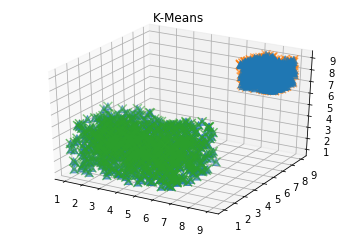

In [254]:
def main():
    np.random.seed(int(time.time()))
    sample_size = 1000
    k = 2
    marker_size = 50
    
    iter_size = sample_size# >> 2
    data = [[x, y, z] for x, y, z in zip(np.random.uniform(1,7,iter_size), np.random.uniform(1,5,iter_size), np.random.uniform(1,5,iter_size))]
    data.extend([[x, y, z] for x, y, z in zip(np.random.uniform(7,9,iter_size), np.random.uniform(7,9,iter_size), np.random.uniform(7,9,iter_size))])
    data = np.array(data)
    
    k_means_ = k_means(k, data, 3)
    
    data = np.array(data)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s=marker_size, marker='^')
    ax.scatter([km[0] for km in k_means_[0][1:]], [km[1] for km in k_means_[0][1:]],[km[2] for km in k_means_[0][1:]], s=marker_size+30, marker='x')
    ax.scatter([km[0] for km in k_means_[1][1:]], [km[1] for km in k_means_[1][1:]],[km[2] for km in k_means_[1][1:]], s=marker_size+30, marker='x')
    ax.scatter(k_means_[0][0][0], k_means_[0][0][1], k_means_[0][0][2], s=marker_size, marker='*')
    ax.scatter(k_means_[1][0][0], k_means_[1][0][1], k_means_[1][0][2], s=marker_size, marker='.')
    plt.title("K-Means")
    plt.show()

if __name__ == '__main__':
    main()